### 로지스틱 회귀
1) 선형방정식을 사용해서 회귀란 단어가 있지만 분류(classification)에 대한 확률을 계산하는 모델

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

fish = pd.read_csv('../Data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# target column unique 값
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Feature 와 Target 구하기

In [6]:
fish_input = fish.iloc[:,1:].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [8]:
fish_target = fish.Species.values
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

# Train과 Test 분리

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input , test_input , train_target , test_target = \
    train_test_split(fish_input,fish_target,random_state=42)

# 표준화
- 회귀식을 쓸 때는 무조건 표준화 시켜줘야 된다.

In [11]:

from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# KNN을 이용한 확률 예측

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print('train score : ',kn.score(train_scaled,train_target))
print('test score : ',kn.score(test_scaled,test_target))

train score :  0.8907563025210085
test score :  0.85


### - test의 확률 예측값 보기

In [28]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_, '이 순서대로 이거일 확률을 보여준다.')
print(np.round(proba,decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 이 순서대로 이거일 확률을 보여준다. 
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용한 확률 <br><br>
- 회귀식을 사용해서 로지스틱 회귀라고 하나 실질적으로 확률을 예측하는 모델 <br><br>
- KNN에서 봤던 확률 예측값을 높여줄 수 있는 모델이다 <br><br>
- 선형회귀식에서 출발하였고 딥러닝 모델의 기반임

$z = a * Weight + b * Length + c * Diagonal + d * Width + e * Height + f$ <br><br> 라는 식이 로지스틱 회귀를 통해 나올 것이다. 
<br><br>
위의 식을 이용하면 나오는 결과값은 -무한대 ~ +무한대 의 범위로 결과 값이 출력된다. <br><br>
이를 해결하는 방법이 Sigmoid 함수를 사용한다. <br><br>
Sigmoid 함수는 결과값이 0 ~ 1 사이의 수만 출력하므로 0.5를 기준으로 양성(True)과 음성(False)으로 분류가 가능하다. <br><br>
로지스틱 회귀를 사용할 경우는 Sigmoid함수를 로지스틱 함수라고 표현 한다. <br><br>

##### Tip 이진 분류만 수행할 수 있다. 

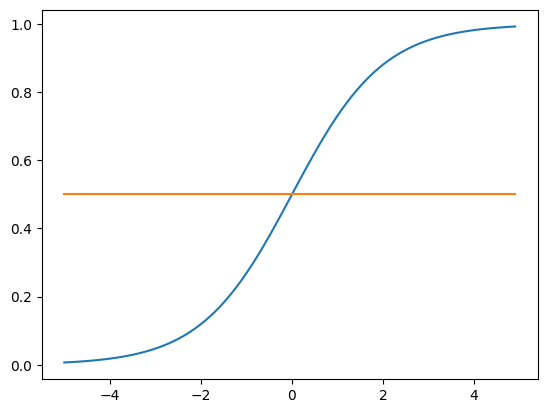

In [31]:
# Sigmoid Graph 출력해 보기
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
y = np.full([100,1],0.5) # 양성과 음성의 기준점
phi = 1 / (1 + np.exp(-z))

plt.plot(
    z,
    phi
)

plt.plot(
    z,
    y
)

plt.show()

### - 로지스틱 회귀로 이진 분류 수행하기

In [34]:
# 2종류의 데이터만 발췌하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [35]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [36]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

### - 확률 예측값 보기

In [37]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

### - 확률 분포 검증

In [38]:
# 클래스 종류
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [39]:
# 회귀식의 가중치와 편향 확인하기
print(lr.coef_ ,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [40]:
# 다중식으로 계산 : 위에서 구한 가중치와 편향과 데이터 값을 곱하고 더해서 계산해 준다. 
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [43]:
# 위의 값을 sigmoid 함수에 대입하여 확률값을 구한다.
from scipy.special import expit

expit(decisions) # 이 값이 확률 예측값으로 확인했던 것 중 1 번 기준으로 계산을 한다.

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

# 로지스틱 회귀로 다중 분류 수행하기

In [44]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled, train_target)
print('train :',lr.score(train_scaled,train_target))
print('test :',lr.score(test_scaled,test_target))

train : 0.9327731092436975
test : 0.925


### - 확률 예측값 보기

In [46]:
# test 데이터로 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [48]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [47]:
# test data로 확률 보기
proba = lr.predict_proba(test_scaled[:5])
np.round(proba,3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

### - 확률 분포 검증 및 사용된 다중 공식 확인

In [49]:
# 사용된 다중 공식 확인
print(lr.coef_ , lr.intercept_)

[[-1.49002391 -1.02914546  2.59346952  7.70356904 -1.20069621]
 [ 0.19618433 -2.01066304 -3.77978384  6.50491084 -1.99483724]
 [ 3.56279446  6.34358274 -8.48971741 -5.75757091  3.79307809]
 [-0.10458082  3.60318722  3.93067712 -3.61735104 -1.75069837]
 [-1.40060956 -6.07503913  5.25968948 -0.87220842  1.86043583]
 [-1.38526622  1.49215352  1.39226801 -5.67733697 -4.40097069]
 [ 0.62150172 -2.32407585 -0.90660287  1.71598745  3.69368859]] [-0.09205115 -0.26290895  3.25101321 -0.14743216  2.65497795 -6.78782044
  1.38422153]


In [51]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions,2) # 이건 확률이 아니라 위의 공식을 사용해서 계산한 값이다.

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

- 계산할 항목이 여러개 이므로 이를 Sigmoid를 사용하면 각자의 값이 생성되어 확률이 1을 넘는 경우가 발생한다. <br><br>
- 다중 항목인 경우에는 softmax를 사용한다. 

In [52]:
from scipy.special import softmax

proba = softmax(decisions, axis = 1)
np.round(proba,3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])